In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import re

In [2]:
jobs_df = pd.read_csv('../data/metal_fab_jobs_master_dr.csv')

In [3]:
late = jobs_df.loc[jobs_df.completion_status == 'Late']

In [4]:
late_describe = late.groupby('process_id')['open_close_days'].describe().sort_values('count', ascending = False).reset_index().head(10)

In [5]:
top_10_late_count = late_describe[['process_id', 'count']]
top_10_late_count.columns = ['process_id', 'count_late']

In [6]:
top10_data = jobs_df.loc[jobs_df['process_id'].isin(late_describe['process_id'])]

In [7]:
all_top10 = top10_data.groupby('process_id')['open_close_days'].describe().sort_values('count', ascending = False).reset_index().head(10)

In [8]:
all_top10_count = all_top10[['process_id', 'count']]
all_top10_count.columns = ['process_id', 'count_total']

In [9]:
top10_job_late_vs_total = pd.merge(top_10_late_count, all_top10_count, 
                               left_on = 'process_id', right_on = 'process_id', 
                               how = 'inner')

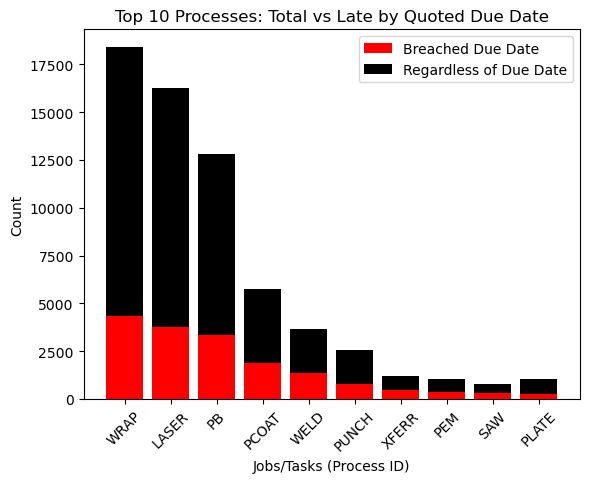

In [44]:
plt.bar(top10_job_late_vs_total.process_id, top10_job_late_vs_total.count_late, color='r')
plt.bar(top10_job_late_vs_total.process_id, top10_job_late_vs_total.count_total, bottom=top10_job_late_vs_total.count_late, color='black')
plt.ylabel("Count")
plt.xlabel("Jobs/Tasks (Process ID)")
plt.legend(["Breached Due Date", "Regardless of Due Date"])
plt.title("Top 10 Processes: Total vs Late by Quoted Due Date")
plt.xticks(rotation=45)
plt.savefig('top_10_process_total_vs_late.png', bbox_inches = 'tight')
plt.show()

In [11]:
jobs_df.head()

,job_id,short_description,process_id,created_date,production_due_date,completed_date,jmp_part_id,jmp_order_quantity,jmp_production_quantity,open_close_days,due_date_diff,completion_status
0,27563-0004-001,WRAP,WRAP,2023-01-02,2023-02-07,2023-02-21,S039-0304,270.0,270.0,50.0,14.0,Late
1,27559-0004-001,MANUAL PRESS BRAKE,PB,2023-01-02,2023-01-17,2023-01-23,S039-0304,40.0,40.0,21.0,6.0,Late
2,27559-0004-001,WRAP,WRAP,2023-01-02,2023-01-17,2023-01-23,S039-0304,40.0,40.0,21.0,6.0,Late
3,27560-0001-001,LASER CUTTING,LASER,2023-01-02,2023-01-24,2023-01-23,S039-0302,50.0,50.0,21.0,-1.0,On-time
4,27560-0001-001,MANUAL PRESS BRAKE,PB,2023-01-02,2023-01-24,2023-01-23,S039-0302,50.0,50.0,21.0,-1.0,On-time


In [12]:
late2 = jobs_df.loc[jobs_df.completion_status == 'Late']

In [13]:
late_describe2 = late2.groupby('jmp_part_id')['open_close_days'].describe().sort_values('count', ascending = False).reset_index().head(10)

In [14]:
top_10_late_count2 = late_describe2[['jmp_part_id', 'count']]
top_10_late_count2.columns = ['jmp_part_id', 'count_late']

In [15]:
top10_data2 = jobs_df.loc[jobs_df['jmp_part_id'].isin(late_describe2['jmp_part_id'])]

In [16]:
all_top102 = top10_data2.groupby('jmp_part_id')['open_close_days'].describe().sort_values('count', ascending = False).reset_index().head(10)

In [17]:
all_top10_count2 = all_top102[['jmp_part_id', 'count']]
all_top10_count2.columns = ['jmp_part_id', 'count_total']

In [18]:
top10_job_late_vs_total2 = pd.merge(top_10_late_count2, all_top10_count2, 
                               left_on = 'jmp_part_id', right_on = 'jmp_part_id', 
                               how = 'inner')

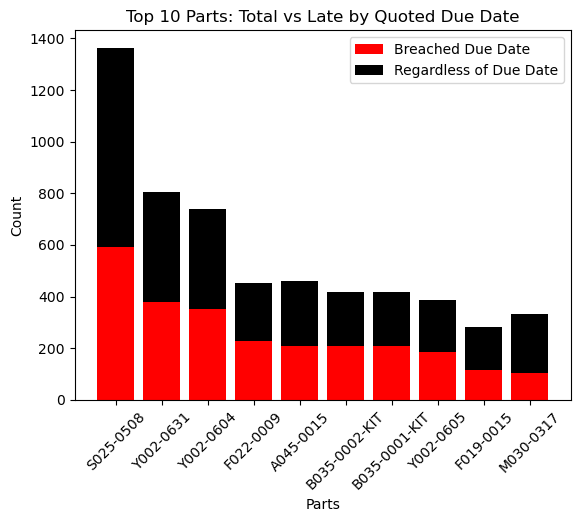

In [46]:
plt.bar(top10_job_late_vs_total2.jmp_part_id, top10_job_late_vs_total2.count_late, color='r')
plt.bar(top10_job_late_vs_total2.jmp_part_id, top10_job_late_vs_total2.count_total, bottom=top10_job_late_vs_total2.count_late, color='black')
plt.ylabel("Count")
plt.xlabel("Parts")
plt.legend(["Breached Due Date", "Regardless of Due Date"])
plt.title("Top 10 Parts: Total vs Late by Quoted Due Date")
plt.xticks(rotation=45)
plt.savefig('top_10_part_total_vs_late.png', bbox_inches = 'tight')
plt.show()